<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472952 entries, 0 to 1472951
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Transaction ID      1472952 non-null  object 
 1   Customer ID         1472952 non-null  object 
 2   Transaction Amount  1472952 non-null  float64
 3   Transaction Date    1472952 non-null  object 
 4   Payment Method      1472952 non-null  object 
 5   Product Category    1472952 non-null  object 
 6   Quantity            1472952 non-null  int64  
 7   Customer Age        1472952 non-null  int64  
 8   Customer Location   1472952 non-null  object 
 9   Device Used         1472952 non-null  object 
 10  IP Address          1472952 non-null  object 
 11  Shipping Address    1472952 non-null  object 
 12  Billing Address     1472952 non-null  object 
 13  Is Fraudulent       1472952 non-null  int64  
 14  Account Age Days    1472952 non-null  int64  
 15  Transaction Hou

c:\Users\zirad\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\zirad\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\zirad\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\zirad\AppData\Local\Programs\Python\Python312

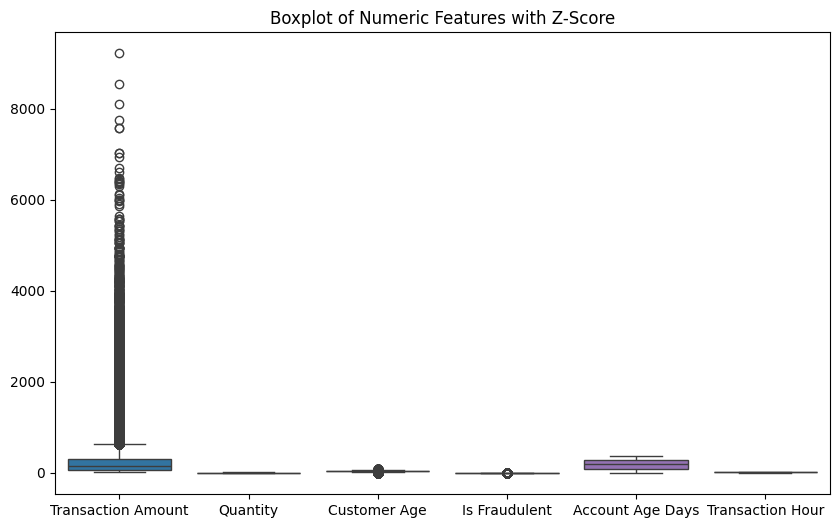

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Fraudulent_E-Commerce_Transaction_Data.csv')  # Replace with the actual file name if different

# Display basic information
print(df.info())

# Display first few rows
print(df.head())

# Sample 1/4 of the dataset to reduce size
df = df.sample(frac=0.25, random_state=42)


# Feature selection for numeric columns only
numeric_features = df.select_dtypes(include=[np.number])

# 1. Z-Score Method
# Compute Z-scores
z_scores = np.abs(zscore(numeric_features))

# Set a threshold for Z-scores (commonly 3)
outliers_z = np.where(z_scores > 3)

print("Z-Score Outliers Detected: ", len(outliers_z[0]))

# Removing outliers
df_cleaned_zscore = df[(z_scores < 3).all(axis=1)]

print(f"Original sampled dataset size: {df.shape}")
print(f"Cleaned dataset size (without Z-Score detected outliers): {df_cleaned_zscore.shape}")

# Visualizing Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_features)
plt.title('Boxplot of Numeric Features with Z-Score')
plt.show()


<class 'pandas.core.frame.DataFrame'>
Index: 5908 entries, 13501 to 20232
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      5908 non-null   object 
 1   Customer ID         5908 non-null   object 
 2   Transaction Amount  5908 non-null   float64
 3   Transaction Date    5908 non-null   object 
 4   Payment Method      5908 non-null   object 
 5   Product Category    5908 non-null   object 
 6   Quantity            5908 non-null   int64  
 7   Customer Age        5908 non-null   int64  
 8   Customer Location   5908 non-null   object 
 9   Device Used         5908 non-null   object 
 10  IP Address          5908 non-null   object 
 11  Shipping Address    5908 non-null   object 
 12  Billing Address     5908 non-null   object 
 13  Is Fraudulent       5908 non-null   int64  
 14  Account Age Days    5908 non-null   int64  
 15  Transaction Hour    5908 non-null   int64  
dtypes: flo

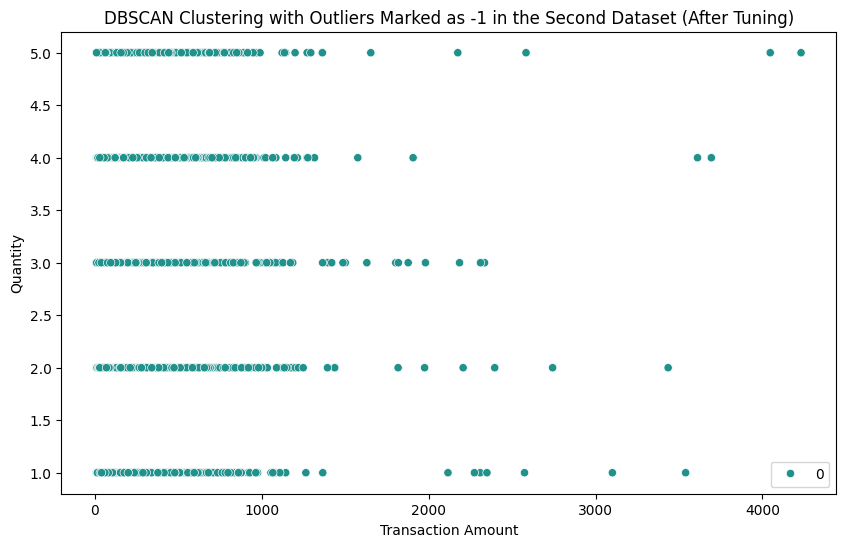

                             Transaction ID  \
13501  cbf3256e-9891-4b34-b05f-b30aacaf3431   
13690  7524db8d-421c-444b-8e15-eac3db747f13   
14096  9d245f7e-939e-48e8-902f-4a9b2cc1bf0e   
5706   5b2aaab6-1d23-46d1-94c5-6ecdef9d74d5   
8688   13f4dd6e-2a59-44e8-8d87-9eba6426971d   

                                Customer ID  Transaction Amount  \
13501  61408c13-6016-4544-bce8-623a25392125              183.04   
13690  c37d798f-181b-462b-97ec-6d0fed18e896              270.56   
14096  30e4fd0b-cc33-4ed4-9731-d584997024c1               32.04   
5706   4fcbd609-f626-4d82-a059-ed099bce7d2b              158.66   
8688   e1ffd0e6-8d74-4484-a7f9-1f1467ce5f89              195.20   

          Transaction Date Payment Method Product Category  Quantity  \
13501  2024-03-01 21:40:44         PayPal    home & garden         5   
13690  2024-04-05 10:14:58     debit card     toys & games         1   
14096  2024-03-20 06:33:48  bank transfer  health & beauty         1   
5706   2024-02-05 21:24:58

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the second dataset (which is large)
df2 = pd.read_csv('Fraudulent_E-Commerce_Transaction_Data_2.csv')  # Replace with the actual file path if needed

# Sample 1/4 of the second dataset to reduce size
df2_sampled = df2.sample(frac=0.25, random_state=42)

# Display basic information about the sampled second dataset
print(df2_sampled.info())

# Handle missing values (basic approach: fill with median)

# Feature selection for numeric columns only
numeric_features_df2 = df2_sampled.select_dtypes(include=[np.number])

# Standardize the data
scaler = StandardScaler()
scaled_features_df2 = scaler.fit_transform(numeric_features_df2)

# Adjusted DBSCAN parameters for outlier detection
dbscan = DBSCAN(eps=1000, min_samples=10)  # Increased eps and min_samples
dbscan.fit(scaled_features_df2)

# Identifying core samples, clusters, and noise points (-1)
labels = dbscan.labels_

# Count number of outliers
n_outliers = np.sum(labels == -1)
print(f"Number of outliers detected by DBSCAN in the second dataset after tuning: {n_outliers}")

# Remove outliers from the dataset
df2_cleaned_dbscan = df2_sampled[labels != -1]

print(f"Original sampled dataset size for the second dataset: {df2_sampled.shape}")
print(f"Cleaned dataset size (without DBSCAN detected outliers): {df2_cleaned_dbscan.shape}")

# Plotting the results after tuning
plt.figure(figsize=(10, 6))
sns.scatterplot(x=numeric_features_df2.iloc[:, 0], y=numeric_features_df2.iloc[:, 1], hue=labels, palette='viridis', legend='full')
plt.title('DBSCAN Clustering with Outliers Marked as -1 in the Second Dataset (After Tuning)')
plt.xlabel(numeric_features_df2.columns[0])
plt.ylabel(numeric_features_df2.columns[1])
plt.show()

# Display the cleaned dataframe head
print(df2_cleaned_dbscan.head())
